In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [25]:

df = pd.read_csv('online_retail.csv', encoding='latin1')


In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [29]:
df.shape

(525461, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [32]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]
num_cols = [col for col in num_cols if "ID" not in col and "Date" not in col]
cat_but_car = [col for col in cat_cols if df[col].nunique() > 10]

In [35]:
cat_cols,num_cols,cat_but_car

(['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country'],
 ['Quantity', 'Price'],
 ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country'])

In [37]:
cat_cols

['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [39]:
#Missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [41]:
#delete missing values
df.dropna(inplace=True)

In [43]:
df.Invoice.value_counts()

Invoice
500356     270
511522     255
531382     251
507235     250
511051     248
          ... 
C507230      1
494888       1
494892       1
494899       1
C524997      1
Name: count, Length: 23587, dtype: int64

In [45]:
df['Invoice'].str.contains('C').value_counts()

Invoice
False    407695
True       9839
Name: count, dtype: int64

In [47]:
# only non returned products

df_Invoice = pd.DataFrame({"Invoice":[row for row in df["Invoice"].values if "C"  not in str(row)]})
df_Invoice.head()
df_Invoice = df_Invoice.drop_duplicates("Invoice")

# The transactions except returned product transactions
df = df.merge(df_Invoice, on = "Invoice")

In [49]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [51]:
# values greater than 0 in quantity and price
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

<Axes: >

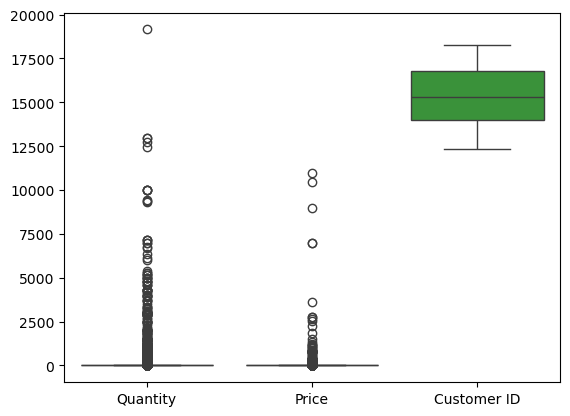

In [53]:
sns.boxplot(df)

In [55]:
# unique in description
df.Description.nunique()

4444

In [57]:
# unique in stockcode
df.StockCode.nunique()

4017

In [59]:
# each unique stock code has a unique product # 1
# we have to clean the data
df_product = df[['Description','StockCode']].drop_duplicates()

In [61]:
df_product = df_product.groupby(['Description']).agg({'StockCode':'count'}).reset_index()
df_product.rename(columns={'StockCode':'SC_counts'},inplace=True)

In [63]:
df_product

,Description,SC_counts
0,DOORMAT UNION JACK GUNS AND ROSES,1
1,3 STRIPEY MICE FELTCRAFT,1
2,4 PURPLE FLOCK DINNER CANDLES,1
3,ANIMAL STICKERS,1
4,BLACK PIRATE TREASURE CHEST,1
...,...,...
4439,ZINC HEART LATTICE TRAY OVAL,1
4440,ZINC METAL HEART DECORATION,1
4441,ZINC POLICE BOX LANTERN,1
4442,ZINC TOP 2 DOOR WOODEN SHELF,1


In [65]:
 df_product[df_product['SC_counts']>1]

,Description,SC_counts
163,"ACRYLIC JEWEL SNOWFLAKE,BLUE",2
538,BLUE FLOCK GLASS CANDLEHOLDER,2
692,BROCANTE SHELF WITH HOOKS,2
1009,COLOURING PENCILS BROWN TUBE,3
1011,COLUMBIAN CANDLE RECTANGLE,2
1012,COLUMBIAN CANDLE ROUND,2
1013,COLUMBIAN CANDLE ROUND,2
1290,EAU DE NILE JEWELLED PHOTOFRAME,2
1605,FRENCH FLORAL CUSHION COVER,2
1608,FRENCH LATTICE CUSHION COVER,2


In [67]:
df_product=df_product.sort_values('SC_counts', ascending=False)

In [69]:
df_product=df_product[df_product['SC_counts']>1]

In [71]:
df_product.head()

,Description,SC_counts
4228,WHITE BAMBOO RIBS LAMPSHADE,3
1009,COLOURING PENCILS BROWN TUBE,3
2331,"METAL SIGN,CUPCAKE SINGLE HOOK",3
3270,RETRO PLASTIC POLKA TRAY,2
4213,WATERING CAN PINK BUNNY,2


In [73]:
# for the same description there are different stock codes we have to remove them

In [75]:
# Filters the rows where the condition is True i.e.keeps only the rows where Description is not in df_product
# here the description(product) has more than one stock code # ~ - bitwise not

df = df[~df["Description"].isin(df_product["Description"])]


In [77]:
#2 just as previous we have to do the same here 
df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()

In [79]:
df_product.rename(columns={'Description':'DC_count'},inplace=True)
df_product = df_product.sort_values('DC_count', ascending=False)
df_product = df_product[df_product['DC_count'] > 1] 

In [81]:
df_product.head()

,StockCode,DC_count
1528,22344,4
213,20685,4
1563,22384,4
1200,21955,4
1530,22346,4


In [83]:
# here there is same stock code is used by many products (description)
df = df[~df["StockCode"].isin(df_product["StockCode"])]

In [85]:
# no. of SC is equal to no. of DC

print(df.StockCode.nunique())
print(df.Description.nunique())

3550
3550


In [87]:
df['StockCode'].value_counts()

StockCode
85123A    3153
22423     1705
21232     1407
84879     1369
21754     1219
          ... 
72754D       1
84250M       1
90054        1
90125E       1
22933        1
Name: count, Length: 3550, dtype: int64

In [89]:
df[~df["StockCode"].astype(str).str.isnumeric()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,12/1/2009 9:06,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,12/1/2009 9:06,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,12/1/2009 9:06,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,12/1/2009 9:08,2.55,15362.0,United Kingdom
...,...,...,...,...,...,...,...,...
407567,538168,85049E,SCANDINAVIAN REDS RIBBONS,6,12/9/2010 19:23,1.25,14702.0,United Kingdom
407584,538168,84030E,ENGLISH ROSE HOT WATER BOTTLE,2,12/9/2010 19:23,4.25,14702.0,United Kingdom
407585,538168,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/9/2010 19:23,3.75,14702.0,United Kingdom
407621,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/9/2010 19:32,3.75,13969.0,United Kingdom


In [97]:
df_filtered = df[df["StockCode"].str.count(r"[A-Za-z]").isin([2, 3, 4])]

print(df_filtered)

       Invoice StockCode               Description  Quantity      InvoiceDate  \
89      489439      POST                   POSTAGE         3   12/1/2009 9:28   
126     489444      POST                   POSTAGE         1   12/1/2009 9:55   
173     489447      POST                   POSTAGE         1  12/1/2009 10:10   
539     489522   79323LP  LIGHT PINK CHERRY LIGHTS         1  12/1/2009 11:45   
574     489526   15056BL   EDWARDIAN PARASOL BLACK         6  12/1/2009 11:50   
...        ...       ...                       ...       ...              ...   
406303  537995      POST                   POSTAGE         2  12/9/2010 11:39   
406343  538003      POST                   POSTAGE         8  12/9/2010 12:05   
406432  538008      POST                   POSTAGE         5  12/9/2010 12:17   
407123  538093   15056BL   EDWARDIAN PARASOL BLACK        12  12/9/2010 14:49   
407152  538093      POST                   POSTAGE         5  12/9/2010 14:49   

         Price  Customer ID

In [99]:
df = df[~df["StockCode"].str.contains("POST")]

In [101]:
df["StockCode"].str.contains("POST")

0         False
1         False
3         False
4         False
5         False
          ...  
407690    False
407691    False
407692    False
407693    False
407694    False
Name: StockCode, Length: 318716, dtype: bool

In [103]:
# Calculating Total Price:

df['TotalPrice'] = df['Quantity'] * df['Price']

In [105]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom,39.6


In [107]:
# invoice is a object so we have to change it to date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [109]:
# Assign "performans_date" as 2 days after the last transaction date of purchase:
from datetime import timedelta
performans_date = df["InvoiceDate"].max() + timedelta(days=2)
performans_date

Timestamp('2010-12-11 20:01:00')

In [111]:
rfm_df = df.groupby("Customer ID").agg ({"InvoiceDate" : lambda InvoiceDate :(performans_date - InvoiceDate.max()).days,
                                     "Invoice" : lambda Invoice: Invoice.nunique(), 
                                     "TotalPrice":  lambda Total_Price: Total_Price.sum()})

In [113]:
rfm_df.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,989.36
12348.0,75,1,170.40
12349.0,44,2,1239.44
12351.0,12,1,238.08


In [115]:
# Replacing column names with Recency, Frequency and Monetary:

rfm_df.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,989.36
12348.0,75,1,170.40
12349.0,44,2,1239.44
12351.0,12,1,238.08


In [117]:
rfm_df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [119]:
# we ar using 5-1 for recency because the most recent customer is important for business
rfm_df["R_Score"]  = pd.qcut(rfm_df['Recency'], 5, [5, 4, 3, 2, 1])
rfm_df["F_Score"]  = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["M_Score"]  = pd.qcut(rfm_df['Monetary'], 5, [1, 2, 3, 4, 5])

In [121]:
# we are giving RFM score based on recency and frequency but concat
rfm_df["RFM_SCORE"] = (rfm_df['R_Score'].astype(str) +
                    rfm_df['F_Score'].astype(str))

rfm_df.head() 

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0,166,2,76.23,2,2,1,22
12347.0,4,2,989.36,5,2,4,52
12348.0,75,1,170.40,2,1,1,21
12349.0,44,2,1239.44,3,2,4,32
12351.0,12,1,238.08,5,1,2,51


## Generating Segments Based on RFM Scores

In [124]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,166,2,76.23,2,2,1,22,22
12347.0,4,2,989.36,5,2,4,52,52
12348.0,75,1,170.40,2,1,1,21,21
12349.0,44,2,1239.44,3,2,4,32,32
12351.0,12,1,238.08,5,1,2,51,51


| Customer Tier       | Recency                  | Frequency                  | Description |
|---------------------|-------------------------|----------------------------|-------------|
| Inactive Users     | Low Recency (1-2)        | Low Frequency (1-2)        | Customers who haven't interacted or made a purchase recently and rarely engage. |
| Dormant Customers  | Low Recency (1-2)        | Moderate Frequency (3-4)   | Customers who haven't interacted recently but have a moderate purchase history. |
| Lost Prospects     | Low Recency (1-2)        | High Frequency (5)         | Customers who haven't interacted recently but had high purchase frequency in the past. |
| Fading Users       | Moderate Recency (3)     | Low Frequency (1-2)        | Customers who interacted recently but haven't made many purchases. |
| Needs Engagement   | Moderate Recency (3)     | Moderate Frequency (3-4)   | Customers who have moderate recency and frequency, needing further attention. |
| Loyal Shoppers     | Moderate Recency (3-4)   | High Frequency (4-5)       | Customers who are consistently loyal with a good purchase frequency. |
| Newcomers          | High Recency (4)         | Low Frequency (1)          | New customers who have interacted recently but haven’t purchased much yet. |
| Fresh Customers    | High Recency (5)         | Low Frequency (1)          | Recently acquired customers who are new and haven’t purchased much yet. |
| Potential VIPs     | High Recency (4-5)       | Moderate Frequency (2-3)   | Customers who are engaged recently with moderate purchase frequency, potentially becoming loyal. |
| Elite Customers    | Very High Recency (5)    | Very High Frequency (4-5)  | The best customers: very recent interactions and high frequency, highly loyal and engaged. |


In [127]:
seg_map = {
    r'[1-2][1-2]': 'inactive_users',
    r'[1-2][3-4]': 'dormant_customers',
    r'[1-2]5': 'lost_prospects',
    r'3[1-2]': 'fading_users',
    r'33': 'needs_engagement',
    r'[3-4][4-5]': 'loyal_shoppers',
    r'41': 'newcomers',
    r'51': 'fresh_customers',
    r'[4-5][2-3]': 'potential_vips',
    r'5[4-5]': 'elite_customers'
}


In [129]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_SCORE,Segment
0,12346.0,166,2,76.23,2,2,1,22,inactive_users
1,12347.0,4,2,989.36,5,2,4,52,potential_vips
2,12348.0,75,1,170.40,2,1,1,21,inactive_users
3,12349.0,44,2,1239.44,3,2,4,32,fading_users
4,12351.0,12,1,238.08,5,1,2,51,fresh_customers


In [131]:
rfm_df.groupby('Segment').agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
inactive_users,1016
loyal_shoppers,736
elite_customers,651
dormant_customers,613
potential_vips,513
fading_users,333
needs_engagement,196
newcomers,91
lost_prospects,78


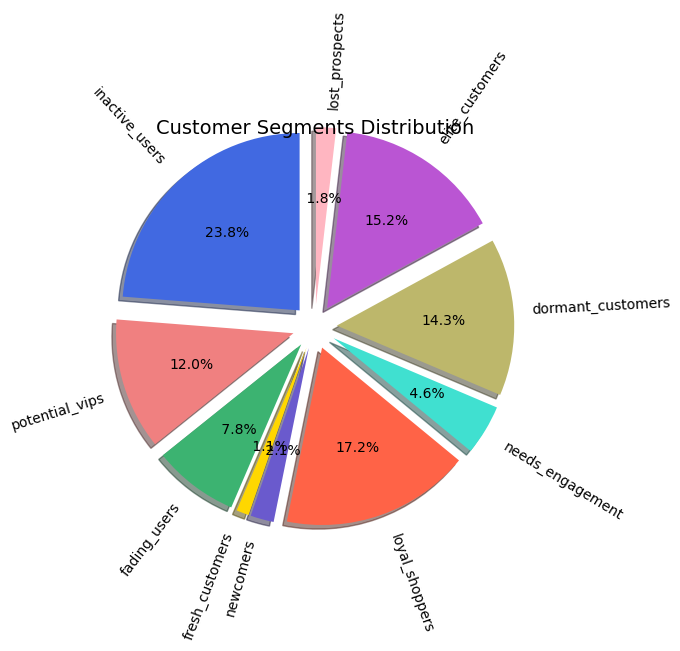

In [133]:

colors = ("royalblue", "lightcoral", "mediumseagreen", "gold", "slateblue", 
          "tomato", "turquoise", "darkkhaki", "mediumorchid", "lightpink")
explodes = [0.15] * 10  


rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                    textprops={'fontsize': 10},  # Reduce text size
                                                    autopct='%4.1f%%',
                                                    startangle=90, 
                                                    radius=1.2,  # Reduce radius from 2 to 1.2
                                                    rotatelabels=True,
                                                    shadow=True, 
                                                    explode=explodes)

plt.ylabel("");  
plt.title("Customer Segments Distribution", fontsize=14) 

plt.show()


## Build Marketing Strategies

In [136]:
rfm_df[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,91.585828,4.371609,1584.118184


In [138]:
rfm_df[["Segment","Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count","sum"])

Recency                Frequency              \
                         mean count     sum       mean count   sum   
Segment                                                              
dormant_customers  151.261011   613   92723   3.048940   613  1869   
elite_customers      8.099846   651    5273  12.314900   651  8017   
fading_users        54.048048   333   17998   1.204204   333   401   
fresh_customers      9.612245    49     471   1.000000    49    49   
inactive_users     211.941929  1016  215333   1.125000  1016  1143   
lost_prospects     121.807692    78    9501   9.064103    78   707   
loyal_shoppers      36.903533   736   27161   6.671196   736  4910   
needs_engagement    53.923469   196   10569   2.413265   196   473   
newcomers           26.560440    91    2417   1.000000    91    91   
potential_vips      19.834308   513   10175   2.013645   513  1033   

                      Monetary                     
                          mean count          sum  
Segment                                            
dormant_customers   999.332171   613   612590.621  
elite_customers    5219.540112   651  3397920.613  
fading_users        370.618168   333   123415.850  
fresh_customers     326.198571    49    15983.730  
inactive_users      329.473783  1016   334745.364  
lost_prospects     3077.782564    78   240067.040  
loyal_shoppers     2135.206489   736  1571511.976  
needs_engagement    774.722398   196   151845.590  
newcomers           346.945714    91    31572.060  
potential_vips      573.170585   513   294036.510

### Key Customer Segments for Targeted Marketing Strategies

##### To boost customer engagement and profitability, it's essential to focus on specific customer segments that drive business growth. Below are four crucial segments that require targeted marketing strategies:

#### Potential VIPs (Top 15% of Customers)

This segment consists of 641 high-value customers who made their last purchase within the past week and generate an average spending of 6000 TL. These customers shop frequently and are highly engaged, making them perfect for cross-selling opportunities.

 ###### Strategy:

Introduce new product launches and exclusive previews, as these customers are open to trying new offerings.
Offer premium loyalty rewards or VIP perks to strengthen their engagement.
Encourage referrals with incentives for bringing in new customers.

 #### Loyal Shoppers (High-Frequency Buyers)
With 818 customers, this segment shows a purchase frequency twice the average (8 transactions per customer vs. the general average of 4). Additionally, their monetary value is 50% higher than the overall customer base, making them an essential group for consistent revenue.

###### Strategy:

Implement personalized recommendations based on past purchases to encourage repeat buying.
Offer exclusive member benefits, such as early access to sales, free shipping, or special discounts.
Strengthen loyalty with anniversary or milestone rewards.

 #### Needs Engagement (High-Value but Low-Frequency Buyers)
This segment includes 184 customers who haven’t made a purchase in nearly two months. While they don’t shop frequently, their total spending is substantial, meaning they contribute significantly to profitability.

 ###### Strategy:

Launch cashback or bonus point campaigns to incentivize repeat purchases.
Offer personalized discounts or limited-time deals based on their previous buying behavior.
Use targeted email or SMS marketing to re-engage them with recommendations or special promotions.

#### Fading Users (High Risk of Churn)
These customers once had a high transaction frequency, similar to Loyal Shoppers, but they haven’t made a purchase in nearly four months, putting them at risk of becoming inactive.

###### Strategy:

Run win-back campaigns with exclusive discounts, reward points, or personalized incentives to reignite their interest.
Send personalized re-engagement emails with offers that highlight their past preferences.
Use a sense of urgency, such as limited-time deals or personalized messages, to encourage action.
